In [1]:
#Step 1: Import required libraries
%pip install statsmodels
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
print("✅ Statsmodels is working!")




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.
✅ Statsmodels is working!


This a Data analysis of HYGGELAND Datasets to asses their customers behaviour, identfy popular products to optimise the prices and increase the sales.  For that we need to prepare the dataset.
First import all the required libraries to do the data analysis.

Second, we extract the dataset from the "Raw" folder

In [2]:
#step 2: Load the dataset
df_full = pd.read_csv("C:/Users/Sheila/Documents/VSCODE PROJECTS/HYGGELAND PROJECT/Hyggeland-project-Data-analysis/jupyter_notebooks/Data/Inputs/Raw/Online_Retail.csv")
# Display first few rows
df_full.head()
print("\n--- Dataset Info (Full) ---")
df_full.info()


--- Dataset Info (Full) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   541909 non-null  int64  
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 33.1+ MB


Third, we are going to verify there is not any error, miss data, etc.


In [3]:
# --- Step 2: Initial Data Inspection ---

print("\n--- Summary Statistics (Full) ---")
print(df_full.describe(include='all'))
print("\n--- Missing Values (Full) ---")
print(df_full.isnull().sum())



--- Summary Statistics (Full) ---
       InvoiceNo StockCode                         Description       Quantity  \
count     541909    541909                              540455  541909.000000   
unique     25900      4070                                4223            NaN   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER            NaN   
freq        1114      2313                                2369            NaN   
mean         NaN       NaN                                 NaN       9.552250   
std          NaN       NaN                                 NaN     218.081158   
min          NaN       NaN                                 NaN  -80995.000000   
25%          NaN       NaN                                 NaN       1.000000   
50%          NaN       NaN                                 NaN       3.000000   
75%          NaN       NaN                                 NaN      10.000000   
max          NaN       NaN                                 NaN   80995.000

The preliminary inspection indicates that  there are 1,454 missing values which is a minimal  percentage (~0.3% of rows), regarding the CustomerID there are no missing values. Despite the low percentage we are going to drop these row, remove invalid values 

In [4]:
# Step 3: Remove missing product descriptions
df_full = df_full.dropna(subset=["Description"])

# Step 4: Remove returns or invalid values
df_full = df_full[df_full["Quantity"] > 0]
df_full = df_full[df_full["UnitPrice"] > 0]
df_full.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


Now, we are going to load the new data to the "Input" folder and then we will start working with it.

In [5]:
import os
#Step 5: Export cleaned dataset
# Make sure the directory exists
os.makedirs("Data/Inputs", exist_ok=True)

# Step 6: Export to CSV
df_full.to_csv(os.path.join("Data/Inputs", "Cleaned_Online_Retail_Full.csv"), index=False)
print("✅ Cleaned data saved successfully.")
df_full.head()

✅ Cleaned data saved successfully.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


I have realised that the labels of the columns are not uniform so, I will change the labels and replace the spaces in column names with underscores.


In [6]:
# Step 7: Replace spaces in column names with underscores

# Insert underscore between lowercase and uppercase letters, then lowercase the whole string
df_full.columns = (
    df_full.columns
    .str.replace(r'(?<=[a-z])(?=[A-Z])', '_', regex=True)  # insert underscore before capital letter
    .str.lower()
)


#Step 8: confirm changes
print(df_full.columns)
df_full.head()


Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'country'],
      dtype='object')


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


Now that the dataset is cleaned we can start doing some visualisations for our analysis. First, we will do a preliminar descriptive statistic table.

In [7]:

# Step 9: Load the cleaned dataset 
df_full = pd.read_csv("Data/Inputs/Cleaned_Online_Retail_Full.csv")

# Step 10: Create descriptive statistics table for all columns
desc_stats_all = df_full.describe(include='all')

# Step 11: Display the full descriptive statistics table
print(desc_stats_all)

#Step 12: Save the descriptive statistics table to a CSV file
desc_stats_all.to_csv("Data/Inputs/Descriptive_Statistics_All.csv", index=True)

C:\Users\Sheila\AppData\Local\Temp\ipykernel_14484\3141010679.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv("Data/Inputs/Cleaned_Online_Retail_Full.csv")


        InvoiceNo StockCode                         Description  \
count    530104.0    530104                              530104   
unique    19962.0      3922                                4026   
top      573585.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq       1114.0      2265                                2323   
mean          NaN       NaN                                 NaN   
std           NaN       NaN                                 NaN   
min           NaN       NaN                                 NaN   
25%           NaN       NaN                                 NaN   
50%           NaN       NaN                                 NaN   
75%           NaN       NaN                                 NaN   
max           NaN       NaN                                 NaN   

             Quantity          InvoiceDate      UnitPrice     CustomerID  \
count   530104.000000               530104  530104.000000  530104.000000   
unique            NaN                18499 

I have realised that despite the changes I did to the labels to make them look uniform, they still appear as in the original file. This has happened maybe because I did the changes after loading the file to the inputs folder. So, we will change the labels again.

In [8]:
# Step 13 Rename columns ex: from InvoiceDate → invoice_date
df_full.columns = (
    df_full.columns
    .str.replace(r'(?<=[a-z])(?=[A-Z])', '_', regex=True)  # insert underscores
    .str.lower()
)

# Step 14 Then save it back to CSV to preserve the change
df_full.to_csv("Data/Inputs/Cleaned_Online_Retail_Full.csv", index=False)
df_full.head()


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


After fixed the labels, we will explain the key observations of the descriptive statistics table.
During the preliminary inspection, in the "quantity" column there was a maximum of 80,995;some huge purchases may distort our analysis (someone ordering 80,000+ items is not normal).But since we do not know if they are mistakes or just punctual purchases we will leave them in the dataset. 
    
Also there was a minimum of -80,995. Negative values maybe mean returns or data errors. So what we did is to remove rows where Quantity <= 0 to clean the dataset and we kept only the numeric quantities >= 0. It was the same case for the "uni_price" column the minimum price was -£11,062 which clearly invalid, thus, we deleted the prices <= 0, too. (Check step 4 above) 


What we can observe is that:
 1. Quantity
    -The mean is about 9.55 items per transaction.
    -The median (50%) is only 3 items, which means most purchases are small.
 2. Unit price
    -The mean price is £4.61, but the standard deviation  is quite elevated (std): £96.76. This maybe explained because the maximum price is £38,970 which could be an outlier.
 3. Customer
    -There are no missing values now. So, I could later on customer-level analysis: frequency, loyalty, total spend, etc. Using this column o identify top customers or segment by purchasing behaviour.
 4. Country
    -There are 38 unique countries. United Kingdom accounts for 495,478 out of 541,909 transactions which we calcualted that is 91% of our data. UK is the main market.Later on, we could compare UK vs. other countries to find different trends creating visualisations of top countries by revenue or orders.    
 5. Description / StockCode / Invoice_No  
    -We observe that most sold item: "WHITE HANGING HEART T-LIGHT HOLDER" (2,369 times). So, This is our bestseller.
 6. Invoice_date
    
    -The most frequent time: 31 Oct 2011, 14:41. Later on, we could visualise trends like busiest hours, days, or months. To understand  and identify customer patterns. 



Now, we will load the cleaned dataset from the "Inputs" folder and then we will modify the Invoice_date column to be able to visualise busiest hours, days or months.


In [9]:
# Step 15: Load the cleaned dataset again
df_full = pd.read_csv("Data/Inputs/Cleaned_Online_Retail_Full.csv")

# Step 16: convert date column to datetime. 
df_full['invoice_date'] = pd.to_datetime(df_full['invoice_date'])
df_full['year'] = df_full['invoice_date'].dt.year
df_full['month'] = df_full['invoice_date'].dt.month 
df_full['day'] = df_full['invoice_date'].dt.day
df_full['day_of_week'] = df_full['invoice_date'].dt.day_name()
df_full['week_of_year'] = df_full['invoice_date'].dt.isocalendar().week
df_full['quarter'] = df_full['invoice_date'].dt.quarter
# Step 17: Save the updated dataset with new date columns
df_full.to_csv("Data/Inputs/Cleaned_Online_Retail_Full.csv", index=False)   
df_full.head()


C:\Users\Sheila\AppData\Local\Temp\ipykernel_14484\3938876516.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv("Data/Inputs/Cleaned_Online_Retail_Full.csv")


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,year,month,day,day_of_week,week_of_year,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010,12,1,Wednesday,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,Wednesday,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010,12,1,Wednesday,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,Wednesday,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010,12,1,Wednesday,48,4


Now, we will create the following primary visualisations based on the descriptive statistics table.
1. Histogram of Unit_price: It will show the price distribution of products. We will use it to detect pricing trends or outliers.

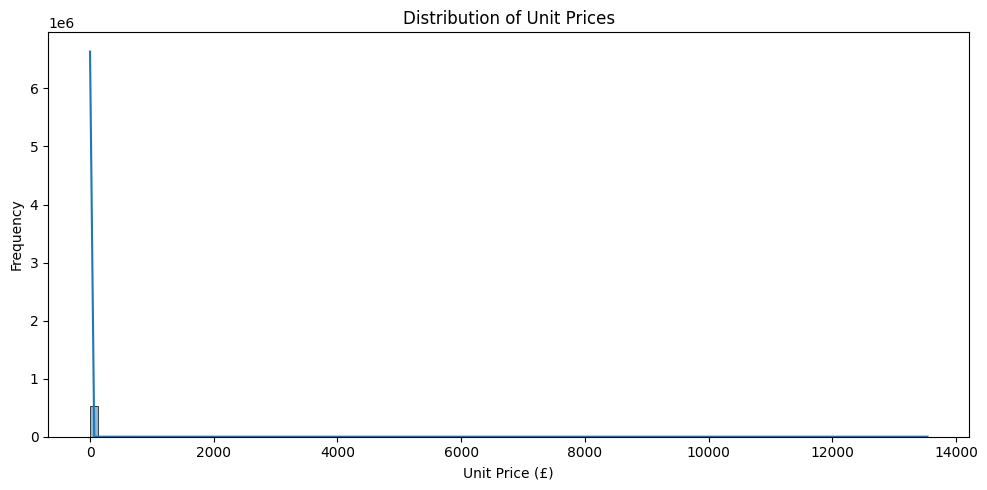

In [10]:
# Step 18: Visualize a histogram of the unit price.
plt.figure(figsize=(10, 5))
sns.histplot(df_full['unit_price'], bins=100, kde=True)
plt.title("Distribution of Unit Prices")
plt.xlabel("Unit Price (£)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


The histogram look "strange" like a long stick probably because   the  dataset contains very high unit prices, like £38,970 and most unit prices are small (e.g., under £10), but a few massive outliers stretch the range. As a result, most of the bars are squashed into the left of the histogram. To find a solution, we will filter the data to remove extreme prices, and reduce the range of prices(bins) from 100 to 50, like this the bars are more visible.

<Axes: xlabel='unit_price', ylabel='Count'>

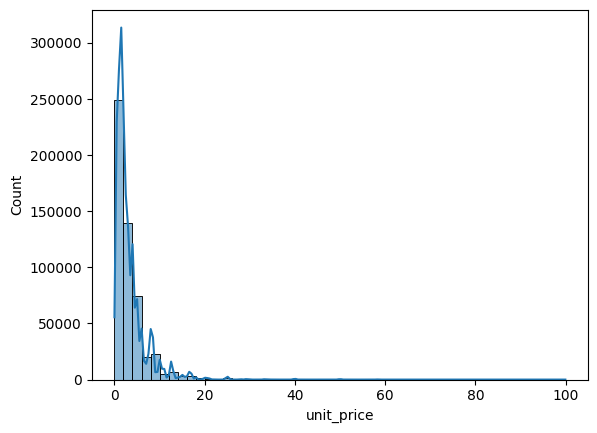

In [11]:
# Step 19 Filter to more realistic unit prices (e.g. under £100)
filtered_df = df_full[df_full['unit_price'] < 100]

# Step 20: Plot again
sns.histplot(filtered_df['unit_price'], bins=50, kde=True)


The figure above shows a right skewed distribution which means that the majority of the prices of the product purchased are < £10. which explains why the mean price is £4.61.

2. Box plots: it will help to identify anomalies and grasp normal buying levels. It will be good for skewed data like quantities.

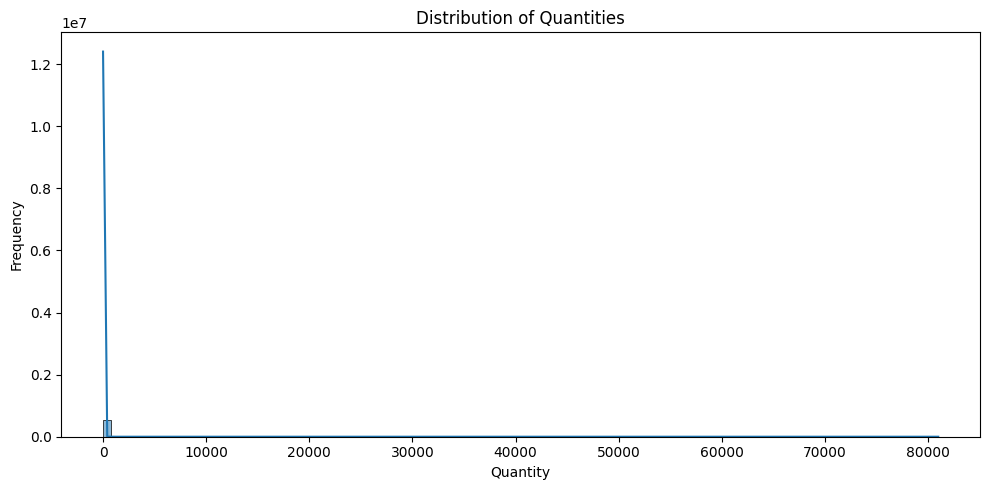

In [12]:
# Step 21: Visualize the distribution of quantities     
plt.figure(figsize=(10, 5))
sns.histplot(df_full['quantity'], bins=100, kde=True)   
plt.title("Distribution of Quantities")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


We have had the same issue as in the previous visualisation, so we will filter in this one, too, to get a more clear distribution.

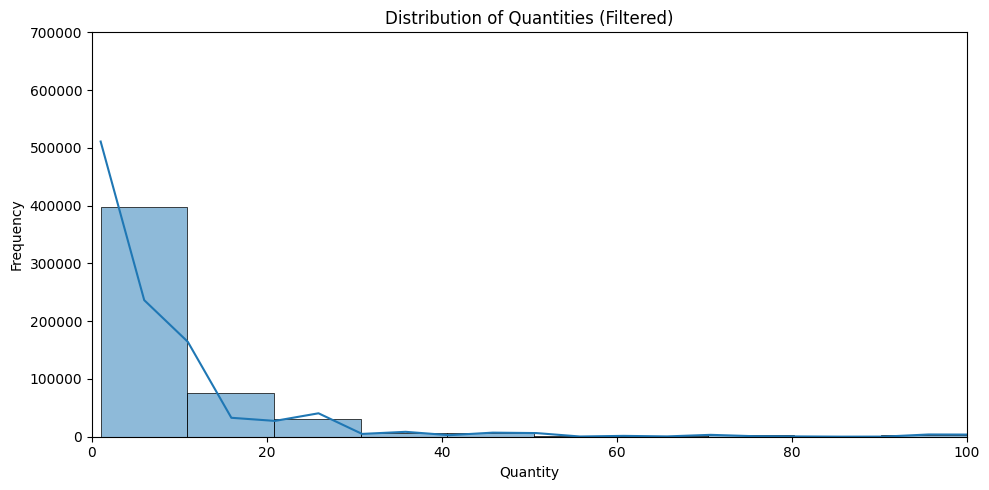

In [13]:

# Step 22: Filter to more realistic quantities (e.g. under 1000)
filtered_df = df_full[df_full['quantity'] < 1000]
# Step 23: Plot again
plt.figure(figsize=(10, 5))
sns.histplot(filtered_df['quantity'], bins=100, kde=True)
plt.title("Distribution of Quantities (Filtered)")
plt.xlabel("Quantity")
plt.xlim(0, 100) # Set x-axis limit to 20
plt.ylabel("Frequency")
plt.ylim(0, 700000) # Set y-axis limit to 700000 
plt.tight_layout()
plt.show()

Also, in this case the distribution is right skewed which explains that the average of purchases was 9.55 items per customer and the median was 3 items per purchase.

3. Bar charts: They are suitable for categorical data like in our dataset. This will show which products are our bestsellers.

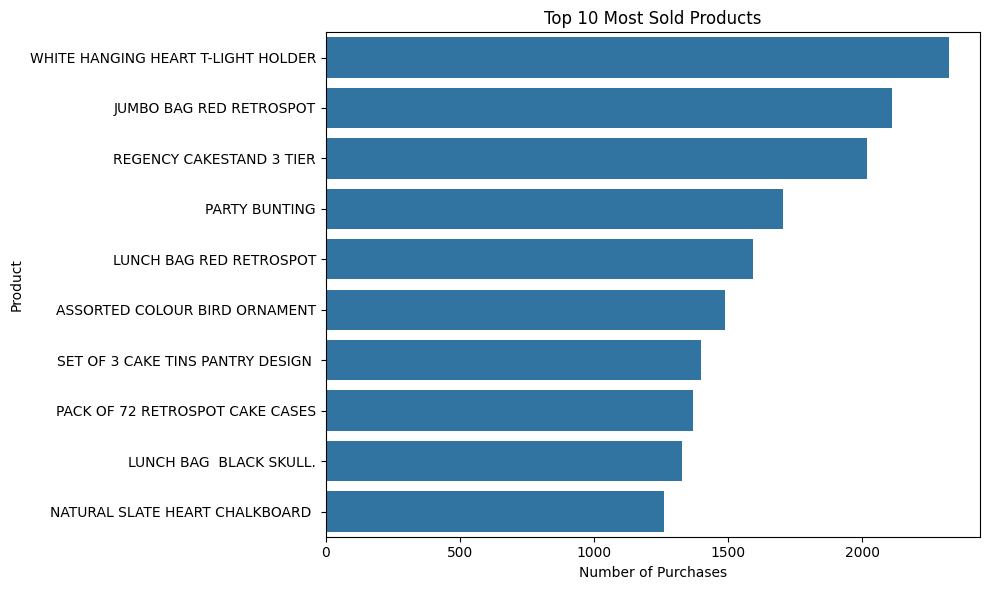

In [14]:
# Step 24: Visualise a Bar Chart of  the top 10 most sold products
top_products = df_full['description'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Most Sold Products")
plt.xlabel("Number of Purchases")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


The chart shows us that the the list of the 10 top products and the number sold is the "WHITE HANGING HEART T-LIGHT HOLDER" as we previously saw in the descriptive statistic table. Also, it could be interesting is to create a plot with the 10 top products and their average price to see which products are most popular (sorted by sales volume) and how much they typically cost, so you can compare high-volume cheap items vs. premium ones, for instance, and help us with the pricing strategy that our company required us. It will allow us to know if our bestsellers are cheap or premiums items.

So, now we will include the average prices in our chart. Additionally, I need to add a code to determine which is the minimum price for a product to be considered as premium one. Statistically, anything above this is in the top 25% of prices, often considered "premium". Thus, we will use the 75% percentile as the starting point to be able to automatically adjusts if the prices change, and it will be easier to explain in the moment to present the final analysis results to the board company.

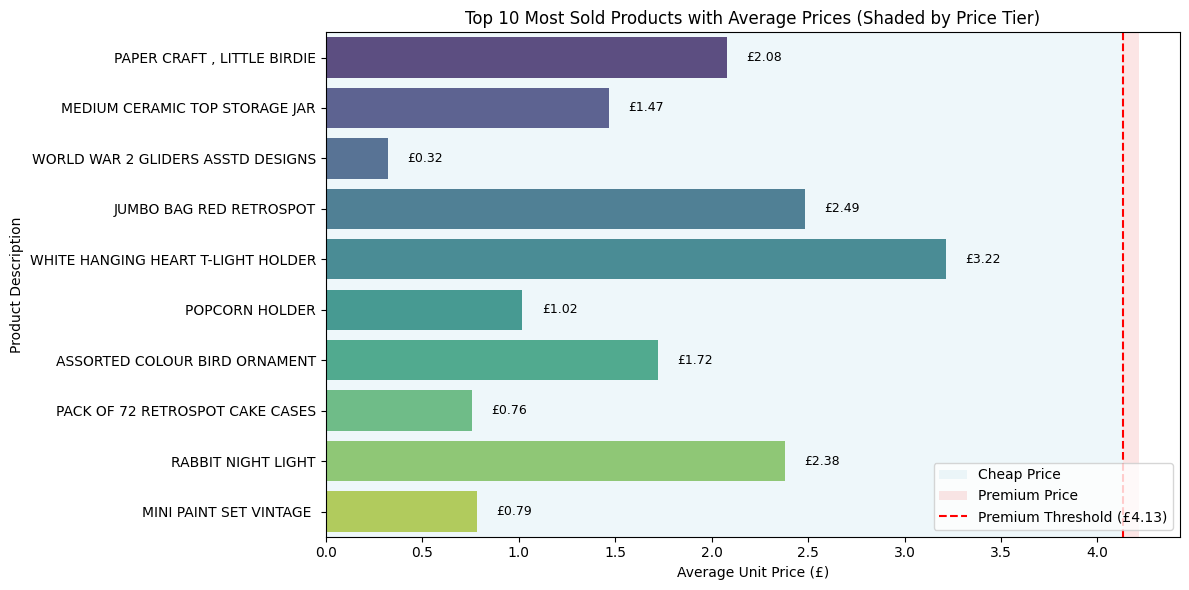

In [15]:
# Step 25: Visualize the top 10 most sold products with average prices
# Step 26: Load the cleaned dataset  
df_full = pd.read_csv(
    "Data/Inputs/Cleaned_Online_Retail_Full.csv",
    dtype={'InvoiceNo': str},
    low_memory=False  #I have added this to avoid the warning because of mixed data types some columns have both numbers and strings, which confuses pandas
    )
# step 27: Calculate average unit price
df_full['unit_price'] = df_full['unit_price'].astype(float)
df_full['quantity'] = df_full['quantity'].astype(float)
df_full['total_price'] = df_full['unit_price'] * df_full['quantity']
# Step 28: Calculate total quantity sold
df_full['total_quantity'] = df_full.groupby('description')['quantity'].transform('sum')
# Step 29: Filter to top 10 most sold products
top_10_products = df_full.groupby('description').agg(
    total_quantity=('quantity', 'sum'),
    avg_price=('unit_price', 'mean')
).nlargest(10, 'total_quantity').reset_index()
# Step 30: Calculate premium price threshold
premium_threshold = df_full['unit_price'].quantile(0.75)
# Step 31: Prepare data
product_stats = df_full.groupby('description').agg(total_quantity=('quantity', 'sum'), avg_price=('unit_price', 'mean')).sort_values(by='total_quantity', ascending=False).head(10).reset_index()
# Step 32: Plot setup
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=product_stats,
    x='avg_price',
    y='description',
    hue='description',      # maps each bar to a unique color
    dodge=False,
    legend=False,           # suppress extra legend
    palette='viridis'
)
# Step 33: Shade background
plt.axvspan(0, premium_threshold, facecolor='lightblue', alpha=0.2, label='Cheap Price')
plt.axvspan(premium_threshold, product_stats['avg_price'].max()+1, facecolor='lightcoral', alpha=0.2, label='Premium Price')
# Step 34: Add data labels
for index, row in product_stats.iterrows():
    barplot.text(
        row.avg_price + 0.1,
        index,
        f"£{row.avg_price:.2f}",
        color='black',
        va='center',
        fontsize=9
    )
# Step 35: Add a line at the premium threshold
plt.axvline(
    premium_threshold,
    color='red',
    linestyle='--',
    label=f'Premium Threshold (£{premium_threshold:.2f})'
)

# Step 36: Add titles and labels
plt.title("Top 10 Most Sold Products with Average Prices (Shaded by Price Tier)")
plt.xlabel("Average Unit Price (£)")
plt.ylabel("Product Description")
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


The chart now shows both the top 10 most sold products and their average unit prices across the full dataset. We have calculated a premium price threshold of £4.13, based on the 75th percentile of all unit prices.

Any product with an average price above £4.13 is classified as a "premium product". Based on this, we can confirm that none of the top 10 most sold products are premium since all fall below this threshold and are therefore considered "cheap products".

This suggests that customer demand is currently concentrated around lower-priced items. There are two possible strategic responses:

    Option 1: Develop a strategy to increase sales of premium products, improving overall revenue per transaction.

    Option 2: Double down on high-volume cheap products and aim to scale by increasing purchase frequency or volume per customer.

However, the decision depends on deeper insight:

    The premium threshold (£4.13) is quite close to the mean unit price (£4.61).

    The median number of items per transaction is just 3 units.

    This makes it important to calculate the average customer spend to understand whether customers are more likely to:

        Buy fewer premium items, or

        Buy more cheap items.

For this we need to know:

   a) How much do customers actually spend? 
   We will use an Histogram because it will show the overall spread of customer spending and overlay the average with a red line to see where the bulk of customers fall.  

💷 Average spend per customer: £2458.89


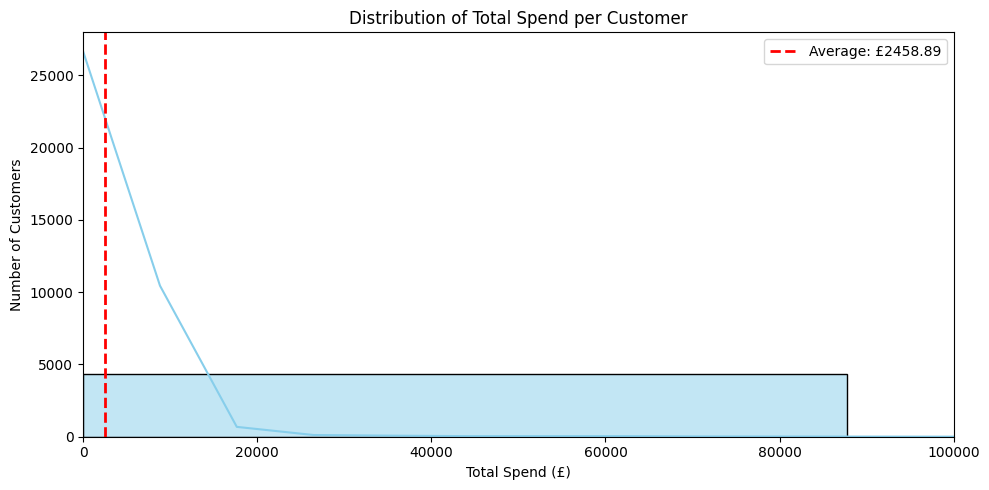

In [16]:
# Step 37: Create the customer_spend DataFrame
customer_spend = (
    df_full.groupby('customer_id')['total_price']
    .sum()
    .reset_index()
    .rename(columns={'total_price': 'total_spend'})
)

# Step 38: Calculate average spend per customer
average_spend = customer_spend['total_spend'].mean()
print(f"💷 Average spend per customer: £{average_spend:.2f}")

# Step 39: Plot histogram of customer spend
plt.figure(figsize=(10, 5))
sns.histplot(customer_spend['total_spend'], bins=20, kde=True, color='skyblue')

# Step 40: Add red line at average spend
plt.axvline(average_spend, color='red', linestyle='--', linewidth=2, label=f'Average: £{average_spend:.2f}')

# Step 41: Final styling
plt.title("Distribution of Total Spend per Customer")
plt.xlabel("Total Spend (£)")
plt.ylabel("Number of Customers")
plt.xlim(0,100000)
plt.legend()
plt.tight_layout()
plt.show()



On one hand, the chart shows  Right-Skewed Distribution which means that the majority of customers have low total spend (located around the left side, close to £0–£5,000 aprox).
Thus, a very small number of customers have extremely high spend values, stretching the right side up to £90,000.

On the other hand, The red dashed line shows the mean total spend. Visually, it sits far to the right of the main cluster, this means: The average is inflated by a few big spenders, and most customers spend less than the average.

The median (middle value) would be a more representative figure for “typical” customer spend in this case.

This suggests the company have a large base of low-spend customers, and a small but powerful segment of high-spend customers.

This leads us to our second question.

  b) Is the average spend aligned with the cheap or premium product strategy?
  It will help us to decide whether customers can afford premium products in quantity? or should we consider strategies to increase the basket base (more items per purchase using bundles or upselling techniques)? 
  For this, we will calculate the average spend per customer, then, compare it to the average unit price of cheap vs. premium products, and finally, estimate how many products customers can buy on average from each category.

In [17]:
# Step 41: Calculate total spend per customer
df_full['total_price'] = df_full['unit_price'] * df_full['quantity']
customer_spend = df_full.groupby('customer_id')['total_price'].sum().reset_index()
customer_spend.rename(columns={'total_price': 'total_spend'}, inplace=True)

# Step 42: Calculate overall average spend per customer
average_spend = customer_spend['total_spend'].mean()
print(f"💰 Average spend per customer: £{average_spend:.2f}")

# Step 43: Recalculate premium threshold (if needed)
premium_threshold = df_full['unit_price'].quantile(0.75)
cheap_threshold = premium_threshold

# Step 44: Calculate average unit price for cheap and premium products
cheap_avg_price = df_full[df_full['unit_price'] <= cheap_threshold]['unit_price'].mean()
premium_avg_price = df_full[df_full['unit_price'] > premium_threshold]['unit_price'].mean()

print(f"🟦 Average price of cheap products (≤ £{cheap_threshold:.2f}): £{cheap_avg_price:.2f}")
print(f"🟥 Average price of premium products (> £{premium_threshold:.2f}): £{premium_avg_price:.2f}")

# Step 45: Estimate how many units customers can afford on average
cheap_units = average_spend / cheap_avg_price
premium_units = average_spend / premium_avg_price

print(f"👛 Avg customer could afford ~{cheap_units:.1f} cheap products or ~{premium_units:.1f} premium products.")


💰 Average spend per customer: £2458.89
🟦 Average price of cheap products (≤ £4.13): £1.81
🟥 Average price of premium products (> £4.13): £10.68
👛 Avg customer could afford ~1359.7 cheap products or ~230.3 premium products.


Based on these results,  to focus on the "Premium Products" should be the company's strategy to increase their sales because:
- Customers have strong purchasing power since many of them could  easily afford multiple "premium products"
- Current best-sellers are cheap and there is room to introduce more premium options and upsell them.
- Premium products yield higher margins and with current capacity (~230 units/customer), the company could drive fewer but higher-value transactions.



The following step will be to analyse how to optimise pricing which is the third of our main goals required by Higgeland to accomplish. Optimising pricing in the Online Retail dataset involves understanding both customer behaviour and product performance.Thus, we to do a customer segmentation which is the four main goal of this project data analysis.

We are going to:
1. Understand Price Sensitivity by comparing "quantity" vs. "unit_price" columns.
2. Do a product segmentation by performance.
3. Identify Revenue Concentration by using Pareto Principles ( 80/20) rule: Do 20% of products generate 80% of revenue?
4. Compare pricing across countries.
5. Evaluate Time-Based Price Opportunity (Monthly)
6. Estimate Product Profitability (Gross Margin)
7. Estimate Price Elasticity of Demand (Using simple linear regression)

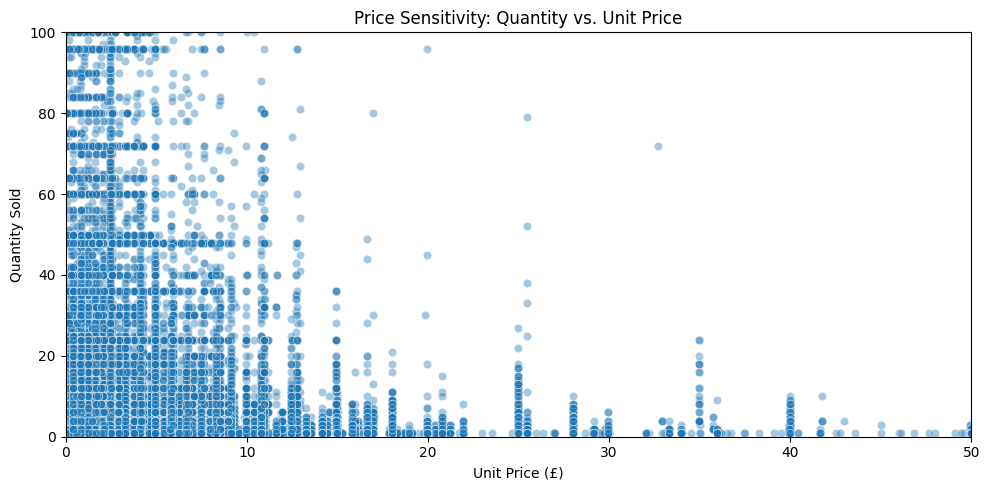

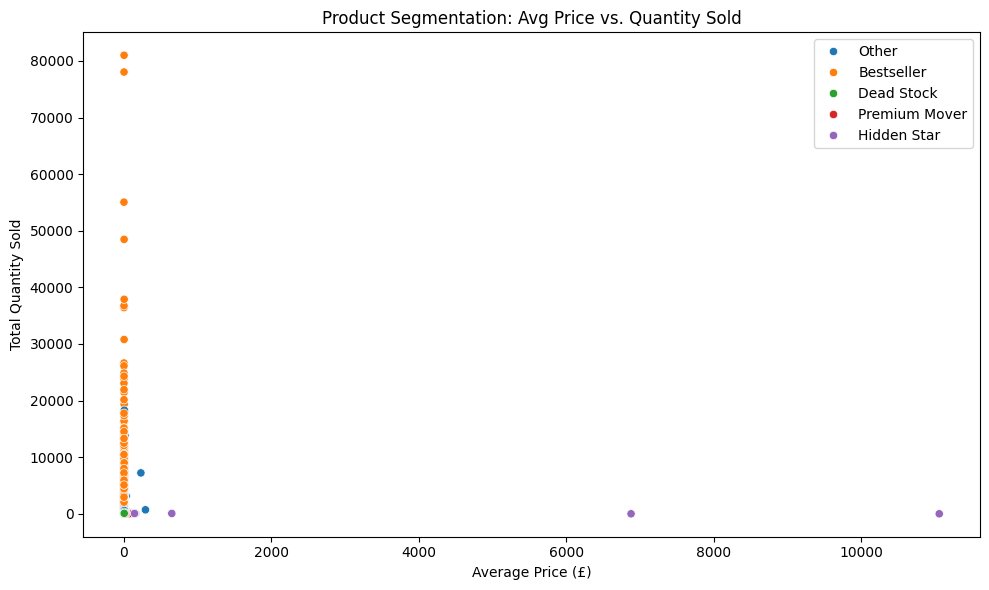

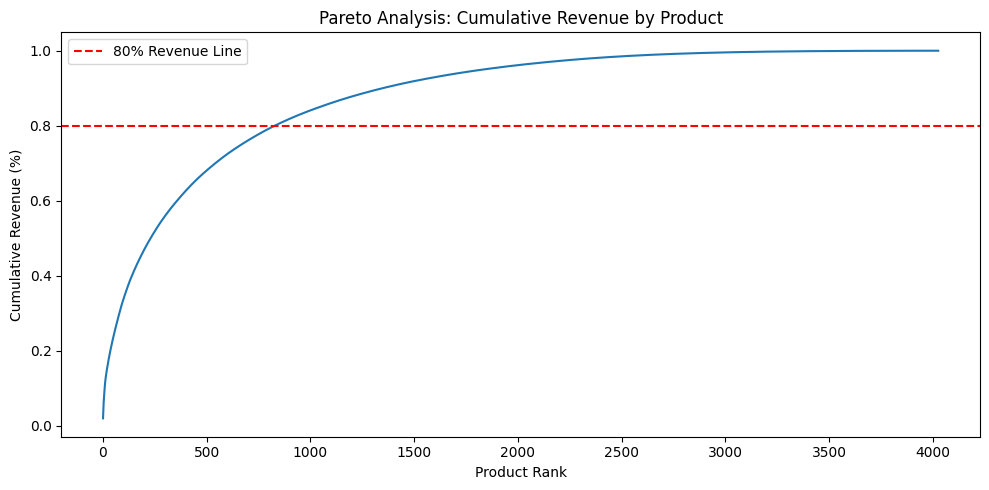

C:\Users\Sheila\AppData\Local\Temp\ipykernel_14484\1319170295.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, y='country', x='avg_unit_price', palette='coolwarm')


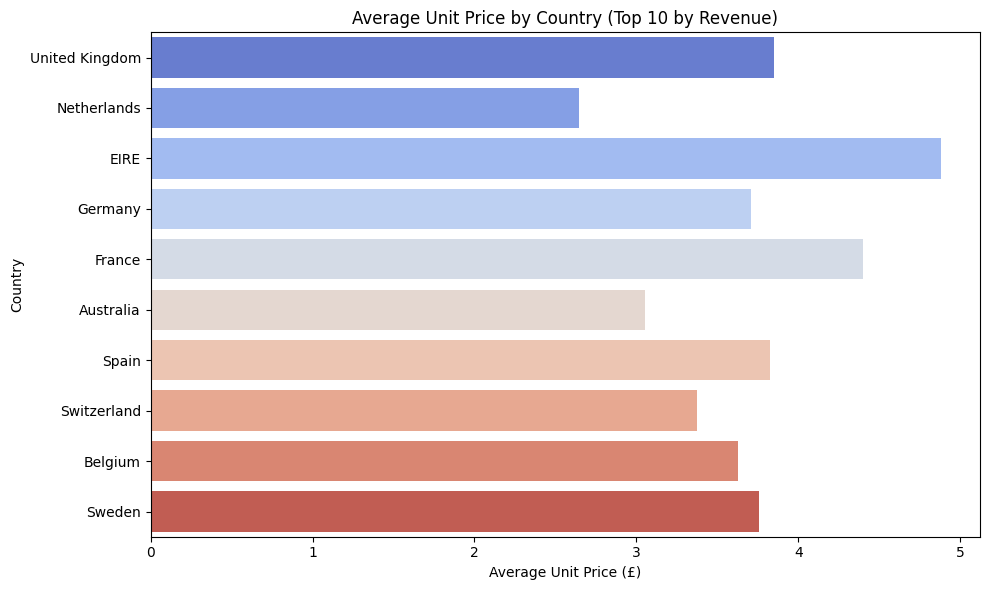

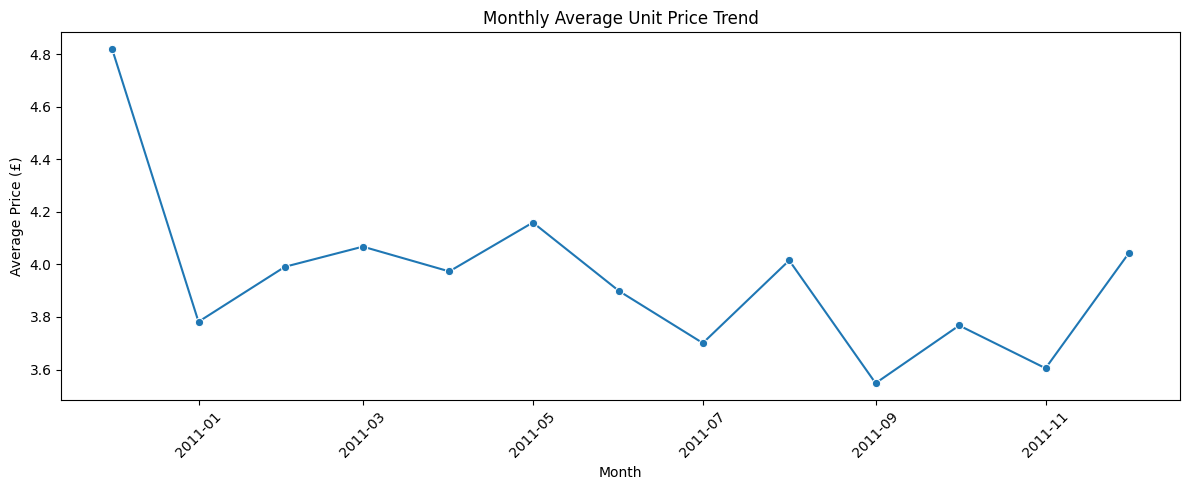

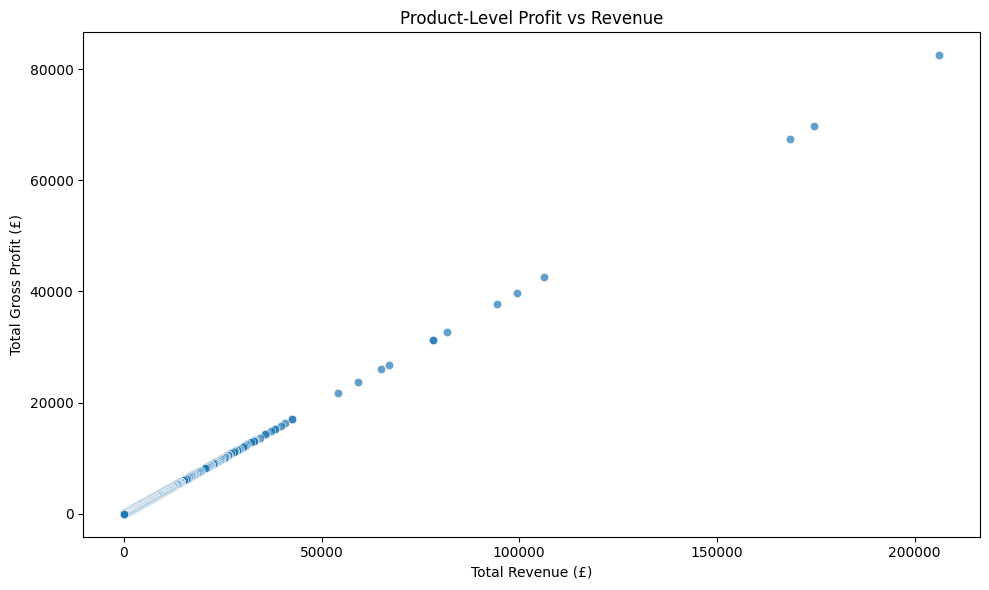

 Top candidate products for elasticity modelling:

description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047.0
JUMBO BAG RED RETROSPOT               48474.0
WHITE HANGING HEART T-LIGHT HOLDER    37891.0
POPCORN HOLDER                        36761.0
ASSORTED COLOUR BIRD ORNAMENT         36461.0
PACK OF 72 RETROSPOT CAKE CASES       36419.0
RABBIT NIGHT LIGHT                    30788.0
MINI PAINT SET VINTAGE                26633.0
PACK OF 12 LONDON TISSUES             26135.0
PACK OF 60 PINK PAISLEY CAKE CASES    24854.0
Name: quantity, dtype: float64
Elasticity estimate for: WHITE HANGING HEART T-LIGHT HOLDER
                            OLS Regression Results                            
Dep. Variable:               quantity   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     3.780
Date:                Mon, 19 May 2025   Prob (F-statistic):           

c:\Users\Sheila\Documents\VSCODE PROJECTS\HYGGELAND PROJECT\Hyggeland-project-Data-analysis\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)


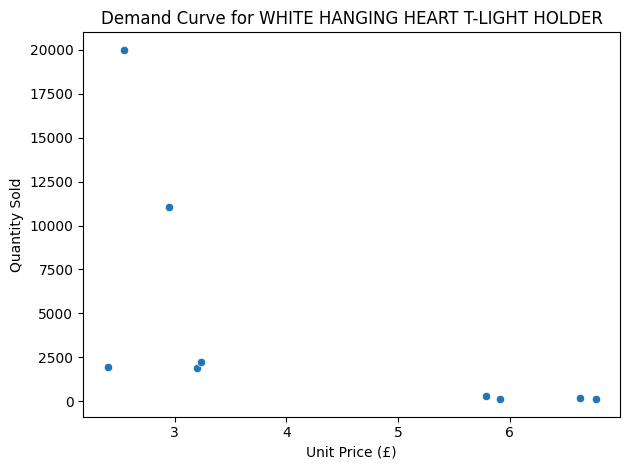

In [21]:
# Step 46: Setup (if not done)
df_full['total_price'] = df_full['unit_price'] * df_full['quantity']

# Step 47: Price Sensitivity 
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_full, x='unit_price', y='quantity', alpha=0.4)
plt.title("Price Sensitivity: Quantity vs. Unit Price")
plt.xlabel("Unit Price (£)")
plt.ylabel("Quantity Sold")
plt.xlim(0, 50)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Step 48: Product Segmentation
product_perf = df_full.groupby('description').agg(
    total_revenue=('total_price', 'sum'),
    avg_price=('unit_price', 'mean'),
    total_quantity=('quantity', 'sum'),
    num_orders=('invoice_no', 'nunique')
).reset_index()

product_perf['segment'] = 'Other'
product_perf.loc[(product_perf['total_quantity'] > 1000) & (product_perf['avg_price'] < 5), 'segment'] = 'Bestseller'
product_perf.loc[(product_perf['total_quantity'] < 500) & (product_perf['avg_price'] > 5), 'segment'] = 'Premium Mover'
product_perf.loc[(product_perf['total_quantity'] < 100) & (product_perf['avg_price'] < 5), 'segment'] = 'Dead Stock'
product_perf.loc[(product_perf['total_quantity'] < 500) & (product_perf['total_revenue'] > 2000), 'segment'] = 'Hidden Star'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=product_perf, x='avg_price', y='total_quantity', hue='segment')
plt.title("Product Segmentation: Avg Price vs. Quantity Sold")
plt.xlabel("Average Price (£)")
plt.ylabel("Total Quantity Sold")
plt.legend()
plt.tight_layout()
plt.show()

# Step 49: Revenue Concentration (Pareto) 
revenue_by_product = df_full.groupby('description')['total_price'].sum().sort_values(ascending=False).reset_index()
revenue_by_product['cum_revenue'] = revenue_by_product['total_price'].cumsum()
revenue_by_product['cum_revenue_pct'] = revenue_by_product['cum_revenue'] / revenue_by_product['total_price'].sum()

plt.figure(figsize=(10, 5))
revenue_by_product['product_rank'] = range(1, len(revenue_by_product) + 1)
sns.lineplot(data=revenue_by_product, x='product_rank', y='cum_revenue_pct')
plt.axhline(0.8, color='red', linestyle='--', label='80% Revenue Line')
plt.title("Pareto Analysis: Cumulative Revenue by Product")
plt.xlabel("Product Rank")
plt.ylabel("Cumulative Revenue (%)")
plt.legend()
plt.tight_layout()
plt.show()

# Step 50: Country-Level Pricing
country_summary = df_full.groupby('country').agg(
    avg_unit_price=('unit_price', 'mean'),
    total_revenue=('total_price', 'sum'),
    num_orders=('invoice_no', 'nunique')
).sort_values(by='total_revenue', ascending=False).reset_index()

top_countries = country_summary.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_countries, y='country', x='avg_unit_price', palette='coolwarm')
plt.title("Average Unit Price by Country (Top 10 by Revenue)")
plt.xlabel("Average Unit Price (£)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

# Step 51: Time-Based Pricing Trends
df_full['invoice_date'] = pd.to_datetime(df_full['invoice_date'])
df_full['month'] = df_full['invoice_date'].dt.to_period('M').dt.to_timestamp()
# Step 52: Group by month
monthly_price_trend = df_full.groupby('month').agg(
    avg_price=('unit_price', 'mean'),
    total_revenue=('total_price', 'sum'),
    total_orders=('invoice_no', 'nunique')
).reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=monthly_price_trend, x='month', y='avg_price', marker='o')
plt.title("Monthly Average Unit Price Trend")
plt.xlabel("Month")
plt.ylabel("Average Price (£)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# Step 53: Estimate Profitability
df_full['estimated_cost'] = df_full['unit_price'] * 0.6
df_full['gross_profit'] = (df_full['unit_price'] - df_full['estimated_cost']) * df_full['quantity']
df_full['gross_margin'] = (df_full['unit_price'] - df_full['estimated_cost']) / df_full['unit_price']

profitability = df_full.groupby('description').agg(
    total_quantity=('quantity', 'sum'),
    avg_price=('unit_price', 'mean'),
    total_revenue=('total_price', 'sum'),
    total_profit=('gross_profit', 'sum'),
    avg_margin=('gross_margin', 'mean')
).reset_index().sort_values(by='total_profit', ascending=False)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=profitability, x='total_revenue', y='total_profit', alpha=0.7)
plt.title("Product-Level Profit vs Revenue")
plt.xlabel("Total Revenue (£)")
plt.ylabel("Total Gross Profit (£)")
plt.tight_layout()
plt.show()

# Step 54: Estimate Price Elasticity (for 1 product) 
price_var = (
    df_full.groupby('description')['unit_price']
    .nunique()
    .reset_index(name='price_variations')
)

# Step 55: Filter for good candidates
strong_candidates = price_var[price_var['price_variations'] >= 5]# Filter products with at least 5 unique price points
# Step 56: Check which of these had high total quantity sold
top_variable_price_products = df_full[df_full['description'].isin(strong_candidates['description'])] \
    .groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)

print(" Top candidate products for elasticity modelling:\n")
print(top_variable_price_products)

# Step 57: now manually pick one from this list for more accurate modelling
# Step 58: Check top-selling of those
df_full[df_full['description'].isin(strong_candidates['description'])] \
    .groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)


# Step 59: Choose top-selling variable-price product
product_name = "WHITE HANGING HEART T-LIGHT HOLDER"

product_df = df_full[df_full['description'] == product_name]
demand_data = product_df.groupby('unit_price')['quantity'].sum().reset_index()

# Step 60: Calculate elasticity
from statsmodels.formula.api import ols
model = ols("quantity ~ unit_price", data=demand_data).fit()
print(f"Elasticity estimate for: {product_name}")
print(model.summary())
# Step 61: Visualize the demand curve
sns.scatterplot(data=demand_data, x='unit_price', y='quantity')
plt.title(f"Demand Curve for {product_name}")
plt.xlabel("Unit Price (£)")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()


***After this part of the analysis we have found out that there is an issue with the OLS regression: the model is based on just 3 price points which is too few to draw reliable conclusions about demand response.The warning: "omni_normtest is not valid with less than 8 observations"  confirms this is not statistically robust.
 What that means? it means that as price increases, quantity drops (negative slope), which is what we expected. However, the result is not statistically significant, therefore, we cannot confidently say price affects quantity for this product.

This probably caused because there were too few pricing variations, limited sales data and possible outliers. 

We have  intruduced some changes in the code to find products with at least 5+ unique price points and 20+ total sales.

Summary of the analysis and interpretation of the graphics and plots.
1. Visual Scatterplot.

   Most products cluster at low prices (under £10) and modest quantities. A few low-price products reach very high volumes, indicating mass appeal.
   Negative relationship overall: as price increases, quantity generally decreases (classic demand curve shape). 
2. Visual Scatterplot with coloured segments.

   Products were categorised into 4 key segments:
    - Bestsellers dominate volume.
    - Hidden Stars are under the radar but lucrative.
    - Premium Movers could benefit from improved marketing and value positioning.
    - Dead Stock may need clearance or removal.
3. Revenue Concentration (Pareto Analysis).

   A Pareto chart showed the cumulative revenue by product rank. Top ~20% of products generate ~80% of revenue — classic Pareto effect.
4. Country-Level Pricing.

   We plotted the average unit price by country, filtered to the top 10 revenue countries. 
    - Certain countries (e.g. Switzerland, Australia) pay higher average prices.
    - Others (e.g. United Kingdom) contribute high volume at lower prices.
    - Regional pricing strategies could boost margins in premium markets.
5. Monthly Average Price Trend.

   Monthly trends showed unit prices over time.
    - Prices remained stable with slight variations.
    - Useful for seasonal pricing and identifying low-revenue months where discounts may help.
6. Profitability analysis.

    - Some products have high sales but low profits, suggesting poor margins.
    - Others (especially Hidden Stars) show strong profitability, worth promoting.
    - Gross margin tracking is key for pricing and promotion decisions.
7. Elasticity Candidate Filtering.

   We filtered for products with at least 5 unique price points, then shortlisted the top 10 by volume.These were the best candidates to estimate price elasticity and test pricing responsiveness.
  
8. Price Elasticity of Selected Product.

   Product Analysed: "WHITE HANGING HEART T-LIGHT HOLDER". The price–demand relationship was negative, but not statistically significant due to limited price variation. More data points or price testing would improve elasticity precision.

 


Now, we will create with Plotly an interactive Trend Analysis to visualise sales trends over time to help us see patterns or anomalies  and allow us to establish marketing strategies in the future taking into account our previous findings and insights.
We will do it in quarterly periods since we already have a column that indicate in which quarter the product was bought.

In [23]:
import plotly.express as px
import pandas as pd

# Step 62: Ensure column is string and sort properly
df_full['quarter'] = df_full['quarter'].astype(str)
df_full['quarter_order'] = pd.to_datetime(df_full['invoice_date']).dt.to_period('Q').astype(str)

# Step 63 Group total sales per quarter
quarterly_sales = df_full.groupby('quarter_order')['total_price'].sum().reset_index()
quarterly_sales.columns = ['Quarter', 'Total_Sales']

# Step 64: Sort quarters chronologically
quarterly_sales = quarterly_sales.sort_values(by='Quarter')
# Step 65: Create interactive line chart
fig = px.line(
    quarterly_sales,
    x='Quarter',
    y='Total_Sales',
    title='Quarterly Sales Trend',
    labels={'Quarter': 'Quarter', 'Total_Sales': 'Total Sales (£)'},
    markers=True
)

fig.update_layout(
    xaxis_title='Quarter',
    yaxis_title='Total Sales (£)',
    template='plotly_white',
    hovermode='x unified'
)

fig.show()



This interactive trend shows: 
1. Clear seasonal patterns: Mostly Q4,it displays significantly higher revenue, possibly tied to Holiday shopping (Christmas) or  End-of-year promotions.
2. Sustained Growth: trend line shows a gradual upward curve and steady growth over time.
3. Volatility Between Quarters: May be due to irregular promotion efforts, stockouts supply issues.
4. Revenue Concentration Periods: One or two quarters dominate revenue which exposes a risk of over-dependence. Q3 and q4 in this case.



Further,more, we will create an interactive heatmap of sales by country using Plotly.

This will show total sales per country and is the most suitable to locate top-performing regions visually.

Also, which countries are your highest revenue generators, this will be wasy to compare countries at a glance and for future strategic targeting of international campaigns.

In [25]:
# Step 66: Create a new DataFrame for country-level sales
# Step 67: Ensure 'country' is a string
df_full['country'] = df_full['country'].astype(str)
# Step 68: Ensure 'total_price' is numeric
df_full['total_price'] = pd.to_numeric(df_full['total_price'], errors='coerce')
# Step 69: Drop rows with NaN values in 'country' or 'total_price'
df_full = df_full.dropna(subset=['country', 'total_price'])
# Step 70: Group total revenue per country
country_sales = df_full.groupby('country')['total_price'].sum().reset_index()
country_sales.columns = ['Country', 'Total_Sales']
import pandas as pd
import plotly.express as px

# Step 71: Group by country 
country_sales = df_full.groupby('country')['total_price'].sum().reset_index()
country_sales.columns = ['Country', 'Total_Sales']

# Step 72: Create the heatmap-style bar chart
fig = px.bar(
    country_sales,
    x='Total_Sales',
    y='Country',
    orientation='h',
    color='Total_Sales',
    color_continuous_scale='Viridis',  # Better contrast for small values
    title='🌍 Total Sales by Country (Enhanced Visibility)',
    labels={'Total_Sales': 'Total Sales (£)', 'Country': 'Country'}
)

# Step 73 Use log scale on the colour bar for more contrast
fig.update_coloraxes(
    colorbar_title="Total Sales (£)",
    colorscale="Viridis",
    cmin=country_sales['Total_Sales'].min(),
    cmax=country_sales['Total_Sales'].max(),
    colorbar_tickformat=".0f"
)

# Step 74: Layout improvements
fig.update_layout(
    template='plotly_white',
    yaxis={'categoryorder': 'total ascending'},
    xaxis_title='Total Sales (£)',
    yaxis_title='Country'
)

fig.show()



